<a href="https://colab.research.google.com/github/joshuaghannan/ECEC247_Project/blob/jgh_tests/PyTorch_Experiments.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
########################################################

# If running with Google Colab

from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [2]:
########################################################

# If running with Google Colab
# Create a folder "C247" and then store the project datasets within that folder
# Check that your datasets are setup correctly

!ls "/content/gdrive/My Drive/C247" # File path

EEG_loading.ipynb	PyTorch_Experiments.ipynb  y_test.npy
person_test.npy		X_test.npy		   y_train_valid.npy
person_train_valid.npy	X_train_valid.npy


In [0]:
import numpy as np

### Load the Datasets

In [0]:
# X_test = np.load("X_test.npy")
# y_test = np.load("y_test.npy")
# person_train_valid = np.load("person_train_valid.npy")
# X_train_valid = np.load("X_train_valid.npy")
# y_train_valid = np.load("y_train_valid.npy")
# person_test = np.load("person_test.npy")

# Change if your directory is different
dataset_path = "/content/gdrive/My Drive/C247/" 

X_test = np.load(dataset_path + "X_test.npy")
y_test = np.load(dataset_path + "y_test.npy")
person_train_valid = np.load(dataset_path + "person_train_valid.npy")
X_train_valid = np.load(dataset_path + "X_train_valid.npy")
y_train_valid = np.load(dataset_path + "y_train_valid.npy")
person_test = np.load(dataset_path + "person_test.npy")

### Shape of data

In [5]:
print ('Training/Valid data shape: {}'.format(X_train_valid.shape))
print ('Test data shape: {}'.format(X_test.shape))
print ('Training/Valid target shape: {}'.format(y_train_valid.shape))
print ('Test target shape: {}'.format(y_test.shape))
print ('Person train/valid shape: {}'.format(person_train_valid.shape))
print ('Person test shape: {}'.format(person_test.shape))


Training/Valid data shape: (2115, 22, 1000)
Test data shape: (443, 22, 1000)
Training/Valid target shape: (2115,)
Test target shape: (443,)
Person train/valid shape: (2115, 1)
Person test shape: (443, 1)


### Setting Up PyTorch

In [0]:
from __future__ import print_function
import torch


In [7]:
x = torch.empty(5, 3)
print(x)

tensor([[7.8273e-20, 0.0000e+00, 0.0000e+00],
        [0.0000e+00, 0.0000e+00, 0.0000e+00],
        [0.0000e+00, 0.0000e+00, 2.8026e-45],
        [0.0000e+00, 1.1210e-44, 0.0000e+00],
        [1.4013e-45, 0.0000e+00, 0.0000e+00]])


In [8]:
x = torch.rand(5, 3)
print(x)

tensor([[0.3476, 0.1593, 0.6721],
        [0.8787, 0.9533, 0.8951],
        [0.6239, 0.0484, 0.4140],
        [0.0075, 0.7418, 0.3758],
        [0.6572, 0.3513, 0.8094]])


In [9]:
x = torch.zeros(5, 3, dtype=torch.long)
print(x)

tensor([[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]])


In [10]:
x = torch.tensor([5.5, 3])
print(x)
print(x.size())

tensor([5.5000, 3.0000])
torch.Size([2])


In [11]:
y = torch.rand(1, 2)
print(x+y)

tensor([[5.5341, 3.9683]])


In [12]:
result = torch.empty(1,2)
torch.add(x, y, out=result)
print(result)


tensor([[5.5341, 3.9683]])


In [13]:
y.add_(x)
print(y)

tensor([[5.5341, 3.9683]])


In [14]:
q = torch.rand(5,3)
print(q)
print(q[1][:])

tensor([[0.3645, 0.8456, 0.7205],
        [0.1364, 0.6892, 0.0677],
        [0.1496, 0.9523, 0.8470],
        [0.1503, 0.1617, 0.4301],
        [0.2088, 0.3136, 0.1768]])
tensor([0.1364, 0.6892, 0.0677])


In [15]:
a = torch.ones(5)
print(a)

b = a.numpy()
print(b)

tensor([1., 1., 1., 1., 1.])
[1. 1. 1. 1. 1.]


In [16]:
# let us run this cell only if CUDA is available
# We will use ``torch.device`` objects to move tensors in and out of GPU
if torch.cuda.is_available():
    device = torch.device("cuda")          # a CUDA device object
    y = torch.ones_like(x, device=device)  # directly create a tensor on GPU
    x = x.to(device)                       # or just use strings ``.to("cuda")``
    z = x + y
    print(z)
    print(z.to("cpu", torch.double))       # ``.to`` can also change dtype together!

tensor([6.5000, 4.0000], device='cuda:0')
tensor([6.5000, 4.0000], dtype=torch.float64)


In [17]:
x = torch.ones(2, 2, requires_grad=True)
print(x)

tensor([[1., 1.],
        [1., 1.]], requires_grad=True)


In [0]:
y = x + 2

In [19]:
print(y)

tensor([[3., 3.],
        [3., 3.]], grad_fn=<AddBackward0>)


In [20]:
print(y.grad_fn)

In [0]:
z = y*x*2

In [0]:
out = z.mean()

In [23]:
print(z,out)

tensor([[6., 6.],
        [6., 6.]], grad_fn=<MulBackward0>) tensor(6., grad_fn=<MeanBackward0>)


In [24]:
print(x)

tensor([[1., 1.],
        [1., 1.]], requires_grad=True)


In [0]:
out.backward()

In [26]:
print(x.grad)

tensor([[2., 2.],
        [2., 2.]])


In [27]:
x = torch.randn(3, requires_grad=True)
print(x)


tensor([-0.0374, -0.4126,  0.6264], requires_grad=True)


In [28]:
y = x * 2
while y.data.norm() < 1000:
    y = y * 2

print(y)

tensor([ -76.6755, -844.9108, 1282.9456], grad_fn=<MulBackward0>)


In [29]:
v = torch.tensor([0.1, 1.0, 0.0001], dtype=torch.float)
y.backward(v)

print(x.grad)


tensor([2.0480e+02, 2.0480e+03, 2.0480e-01])


In [30]:
print(x.requires_grad)
print((x ** 2).requires_grad)

with torch.no_grad(): # blocks from tracking gradient history
    print((x ** 2).requires_grad)

True
True
False


In [31]:
print(x.requires_grad)
y = x.detach() # creates new tensor with same content that doesn't require gradients
print(y.requires_grad)
print(x.eq(y).all()) # check that they're the same

True
False
tensor(True)


### Creating NNs

In [32]:
import torch
import torch.nn as nn
import torch.nn.functional as F


class Net(nn.Module):

    def __init__(self):
        super(Net, self).__init__()
        # 1 input image channel, 6 output channels, 3x3 square convolution
        # kernel
        self.conv1 = nn.Conv2d(1, 6, 3)
        self.conv2 = nn.Conv2d(6, 16, 3)
        # an affine operation: y = Wx + b
        self.fc1 = nn.Linear(16 * 6 * 6, 120)  # 6*6 from image dimension
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        # Max pooling over a (2, 2) window
        x = F.max_pool2d(F.relu(self.conv1(x)), (2, 2))
        # If the size is a square you can only specify a single number
        x = F.max_pool2d(F.relu(self.conv2(x)), 2)
        x = x.view(-1, self.num_flat_features(x))
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

    # Backward function is automatically computed 

    def num_flat_features(self, x):
        size = x.size()[1:]  # all dimensions except the batch dimension
        num_features = 1
        for s in size:
            num_features *= s
        return num_features


net = Net()
print(net)


Net(
  (conv1): Conv2d(1, 6, kernel_size=(3, 3), stride=(1, 1))
  (conv2): Conv2d(6, 16, kernel_size=(3, 3), stride=(1, 1))
  (fc1): Linear(in_features=576, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)


In [33]:
params = list(net.parameters())
print(len(params))
print(params[0].size())  # conv1's .weight

10
torch.Size([6, 1, 3, 3])


In [34]:
input = torch.randn(1, 1, 32, 32)
out = net(input)
print(out)


tensor([[-0.0109, -0.0495,  0.0846,  0.0580, -0.0097,  0.0049,  0.0533,  0.0519,
          0.1561,  0.0312]], grad_fn=<AddmmBackward>)


In [0]:
net.zero_grad()
out.backward(torch.randn(1, 10))

In [0]:
# PyTorch only supports minibatching

### Creating a Neural Network

In [0]:
import torch
from torch.autograd import Variable


In [38]:
num_in = 10
num_hidden = 50

# for h = relu(Wx + b)
# they actually have values (unlike TF)
# use requires_grad=True so it can calc gradients
# Pytorch Variables are wrappers for tensors
  # Stores the value of the tensor (x.data)
  # if requires_grad = true, holds another varaible
  # (x.grad which holds grads). Thus, x.grad.data is pytorch tensor that contains
  # the values of the gradient of x

# x = Variable(torch.randn(num_in), requires_grad=True)
# W = Variable(torch.randn(num_hidden, num_in), requires_grad=True)
# b = Variable(torch.randn(num_hidden), requires_grad=True)

# use .cuda() to enable GPU use
x = Variable(torch.randn(num_in).cuda(), requires_grad=True)
W = Variable(torch.randn(num_hidden, num_in).cuda(), requires_grad=True)
b = Variable(torch.randn(num_hidden).cuda(), requires_grad=True)

z = torch.matmul(W,x) + b
h = torch.max(z, torch.zeros(num_hidden).cuda())

# loss function
loss = (torch.sum(h)-1).pow(2)

# takes loss function, does back prop to calc gradient
# for each variable with req_gradient = true
loss.backward()
print(x.grad.data.shape)
print(W.grad.data.shape)
print(b.grad.data.shape)

torch.Size([10])
torch.Size([50, 10])
torch.Size([50])


### PyTorch CNN Example

In [0]:
import torch
from torch.autograd import Variable
import torch.nn as nn # imports all nn layers

import torch.optim as optim # imports different optimizers

In [0]:
# NN for CIFAR-10
model = nn.Sequential (
    # Conv2d: depth, # filters, filter size (7x7xdepth)
    nn.Conv2d(3, 32, kernel_size=7, stride=1), # 32x32x3 input, 10 outputs
    nn.ReLU(inplace=True),
    nn.BatchNorm2d(num_features=32),
    nn.MaxPool2d(kernel_size=2, stride=2), # 13x13x32 feature map, with 5408 values
    # keep track of dimensions
    nn.Flatten(),
    nn.Linear(5408, 1024), # Default weight initialization is Xavier Uniform
    nn.ReLU(inplace=True),
    nn.Linear(1024, 10), # Default weight initialization is Xavier Uniform
)

# To run on CPU:
# dtype = torch.FloatTensor 

# To run on GPU:
dtype = torch.cuda.FloatTensor

model.type(dtype)
loss_fn = nn.CrossEntropyLoss().type(dtype)
optimizer = optim.RMSprop(model.parameters(), lr=1e-02)


### Creating the Dataset

In [41]:
# Run on GPU
dtype = torch.cuda.FloatTensor

N, C, H, W = 128, 3, 32, 32 # 128 examples, 32x32x3 random numbers
x = Variable(torch.randn(N, C, H, W).cuda()) # input
y = np.random.randint(0, 10, size=128) # labels
y = Variable(torch.Tensor(y).cuda(), requires_grad=False)
x.type(dtype)
y.type(dtype)

tensor([5., 4., 3., 8., 3., 7., 8., 9., 3., 5., 6., 6., 1., 9., 1., 8., 2., 2.,
        5., 6., 2., 3., 6., 5., 8., 6., 1., 7., 5., 5., 7., 9., 5., 0., 1., 6.,
        4., 4., 2., 0., 4., 4., 8., 6., 3., 9., 9., 0., 8., 6., 4., 6., 0., 4.,
        5., 5., 9., 7., 6., 4., 9., 7., 0., 5., 5., 1., 9., 0., 2., 4., 5., 0.,
        0., 1., 9., 1., 0., 9., 4., 6., 5., 3., 4., 9., 3., 8., 0., 1., 1., 6.,
        7., 5., 6., 5., 5., 8., 8., 0., 0., 7., 7., 0., 6., 0., 2., 9., 5., 9.,
        4., 7., 5., 1., 1., 1., 1., 4., 5., 1., 4., 8., 4., 0., 3., 1., 5., 4.,
        6., 1.], device='cuda:0')

### Creating the Model

In [0]:
model = nn.Sequential (
    # Conv2d: depth, # filters, filter size (7x7xdepth)
    nn.Conv2d(3, 32, kernel_size=7, stride=1), # 32x32x3 input, 10 outputs
    nn.ReLU(inplace=True),
    nn.BatchNorm2d(num_features=32),
    nn.MaxPool2d(kernel_size=2, stride=2), # 13x13x32 feature map, with 5408 values
    # keep track of dimensions
    nn.Flatten(),
    nn.Linear(5408, 1024), # Default weight initialization is Xavier Uniform
    nn.ReLU(inplace=True),
    nn.Linear(1024, 10), # Default weight initialization is Xavier Uniform
)

model.type(dtype)
loss_fn = nn.CrossEntropyLoss().type(dtype)
optimizer = optim.RMSprop(model.parameters(), lr=1e-02)

### Train the Model

In [43]:
for t in range(10):

  # Calculate the loss
  y_pred = model(x)
  loss = loss_fn(y_pred, y.type(torch.LongTensor).cuda())

  # Do backprop
  model.zero_grad() # do this so that PyTorch doesn't add gradients for CNNs (don't call for RNN)
  loss.backward()

  # Optimize the parameters
  optimizer.step()

  print(t)


0
1
2
3
4
5
6
7
8
9


### Model Loss

In [44]:
y_pred = model(x)
loss = loss_fn(y_pred, y.type(torch.LongTensor).cuda())
print(loss)

tensor(0., device='cuda:0', grad_fn=<NllLossBackward>)


In [45]:
model # prints the model params

Sequential(
  (0): Conv2d(3, 32, kernel_size=(7, 7), stride=(1, 1))
  (1): ReLU(inplace=True)
  (2): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (4): Flatten()
  (5): Linear(in_features=5408, out_features=1024, bias=True)
  (6): ReLU(inplace=True)
  (7): Linear(in_features=1024, out_features=10, bias=True)
)

In [0]:
# Use DataLoader to input new data (also does minibatching, shuffling, etc)

In [0]:
# Use import torchvision to get pretrained models (alexnet, vgg, etc.)

### TensorFlow

In [58]:
import numpy as np
# import tensorflow as tf
import matplotlib.pyplot as plt 

import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()

Instructions for updating:
non-resource variables are not supported in the long term


In [67]:
tf.reset_default_graph() # clear old variables
# tf.compat.v1.reset_default_graph()

# define input (data that changes every batch)
# first dim is None, so the data is automatically based on batch size fed in

X = tf.placeholder(tf.float32, [None, 32, 32, 3])
y = tf.placeholder(tf.int64, [None])

# Define the model
# variables (unlike placeholders) need to be initialized to some value (using Xavier)
W1 = tf.get_variable('W1', shape=[7, 7, 3, 32])
b1 = tf.get_variable('b1', shape=[32])
W2 = tf.get_variable('W2', shape=[5408, 1024])
b2 = tf.get_variable('b2', shape=[1024])
W3 = tf.get_variable('W3', shape=[1024, 10])
b3 = tf.get_variable('b3', shape=[10])

# Define the computational graph
a1 = tf.nn.conv2d(X, W1, strides=[1,1,1,1], padding='VALID') +b1
h1 = tf.nn.relu(a1)
z2 = tf.nn.max_pool(h1, ksize=[1,2,2,1], strides=[1,2,2,1], padding="VALID")
z2_flat = tf.reshape(z2, [-1, 5408])
a2 = tf.matmul(z2_flat, W2) + b2
h2 = tf.nn.relu(a2)
y_out = tf.matmul(h2, W3) + b3

# define loss and optimizer
# logits are scroes
# cross entropy accepts onehot input (instead of classes like 1 - 10)
total_loss = tf.losses.softmax_cross_entropy(tf.one_hot(y,10), logits=y_out)
# total_loss = tf.nn.softmax_cross_entroy_with_logits_v2(tf.one_hot(y,10), logits=y_out)
mean_loss = tf.reduce_mean(total_loss)


Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [0]:

tf.config.set_soft_device_placement(True)

# define te weight updates
learning_rate = 1e-02
grad_W1, grad_b1, grad_W2, grad_b2, grad_W3, grad_b3 = tf.gradients(mean_loss, (W1, b1, W2, b2, W3, b3))
new_W1 = W1.assign(W1 - learning_rate * grad_W1)
new_W2 = W2.assign(W2 - learning_rate * grad_W2)
new_W3 = W3.assign(W3 - learning_rate * grad_W3)
new_b1 = b1.assign(b1 - learning_rate * grad_b1)
new_b2 = b2.assign(b2 - learning_rate * grad_b2)
new_b3 = b3.assign(b3 - learning_rate * grad_b3)

# data set
x_train = np.random.randn(64, 32, 32, 3)
y_train = np.random.randint(0, 10, 64)

losses=[]

with tf.Session() as sess:
  # with tf.device("/GPU:0"): # "/gpu:0" or "/cpu:0"
    tf.global_variables_initializer().run() # initial all the variable
    feed_dict = {X: x_train,
                 y: y_train,
                 }
    for t in range(50):
      out = sess.run(mean_loss, feed_dict=feed_dict)
      losses.append(out)

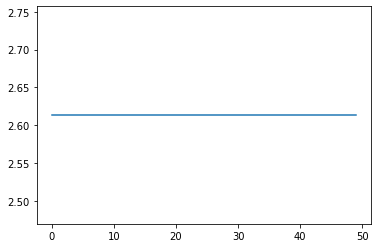

In [76]:
plt.plot(losses)
plt.show()
# Didn't work because didn't compute new nodes

In [0]:

tf.config.set_soft_device_placement(True)

# define te weight updates
learning_rate = 1e-02
grad_W1, grad_b1, grad_W2, grad_b2, grad_W3, grad_b3 = tf.gradients(mean_loss, (W1, b1, W2, b2, W3, b3))
new_W1 = W1.assign(W1 - learning_rate * grad_W1)
new_W2 = W2.assign(W2 - learning_rate * grad_W2)
new_W3 = W3.assign(W3 - learning_rate * grad_W3)
new_b1 = b1.assign(b1 - learning_rate * grad_b1)
new_b2 = b2.assign(b2 - learning_rate * grad_b2)
new_b3 = b3.assign(b3 - learning_rate * grad_b3)
# Tells it to calculate updates
updates = tf.group(new_W1, new_W2, new_W3, new_b1, new_b2, new_b3)

# data set
x_train = np.random.randn(64, 32, 32, 3)
y_train = np.random.randint(0, 10, 64)

losses=[]

with tf.Session() as sess:
  # with tf.device("/GPU:0"): # "/gpu:0" or "/cpu:0"
    tf.global_variables_initializer().run() # initial all the variable
    feed_dict = {X: x_train,
                 y: y_train,
                 }
    for t in range(50):
      # Add updates
      out = sess.run([mean_loss, updates], feed_dict=feed_dict)
      losses.append(out)

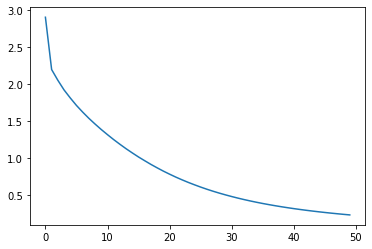

In [78]:
plt.plot(losses)
plt.show()
# Updates better